In [1]:
import winsound as ws
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import cv2
from sklearn.cluster import KMeans

In [5]:
userbook = pd.read_csv("dataset\\ratings.csv")
userbook.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


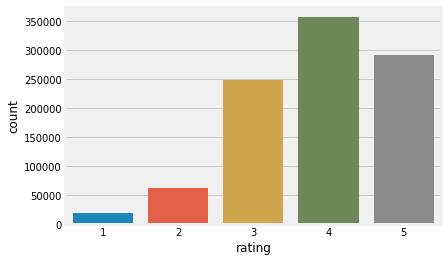

In [6]:
#What is the distribution of ratings?
ax = sns.countplot(x="rating", data=userbook)

In [39]:
#Number of ratings per user

In [27]:
userslist = userbook["user_id"].drop_duplicates(keep="first").values.tolist()
users = pd.DataFrame(columns = ["user_id", "n_rating"])
listnewusers = []
for user in userslist:
    usertable = userbook[userbook.user_id == user]
    n = usertable["rating"].count()
    newuser = pd.DataFrame(data = {"user_id": [user], "n_rating": [n]})
    listnewusers.append(newuser)
users = pd.concat(listnewusers, ignore_index=True)

In [28]:
users

,n_rating,user_id
0,181,314
1,177,439
2,186,588
3,187,1169
4,190,1185
5,180,2077
6,193,2487
7,190,2900
8,185,3662
9,188,3922


In [73]:
short_users=users.where(users["n_rating"] <= 50).dropna()
short_users

,n_rating,user_id
535,39.0,13925.0
797,47.0,40884.0
836,50.0,5766.0
838,40.0,7211.0
839,24.0,7302.0
841,47.0,8305.0
844,47.0,11031.0
848,29.0,12776.0
851,27.0,14742.0
852,27.0,16086.0


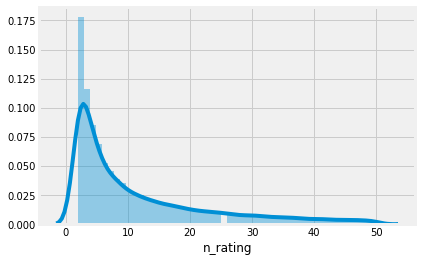

In [74]:
a1 = sns.distplot(short_users["n_rating"].dropna())

In [ ]:
#Number of ratings per book

In [78]:
dataRatings = pd.read_csv("dataset\\ratings.csv")
dataRatings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [80]:
dataRatings.groupby(["book_id"]).mean()

,user_id,rating
book_id,,
1,25908.970000,4.240000
2,25341.240000,4.210000
3,24630.150000,3.090000
4,25644.380000,4.460000
5,23997.970000,3.890000
6,29096.200000,4.090000
7,21870.130000,3.920000
8,26180.270000,3.830000
9,24285.350000,3.350000


In [85]:
booklist = dataRatings["book_id"].drop_duplicates(keep="first").values.tolist()
books = pd.DataFrame(columns = ["book_id", "n_rating"])
listnewbooks = []
for book in booklist:
    booktable = dataRatings[dataRatings.book_id == book]
    n = booktable["rating"].count()
    newbook = pd.DataFrame(data = {"book_id": [book], "n_rating": [n]})
    listnewbooks.append(newbook)
books = pd.concat(listnewbooks, ignore_index=True)

In [90]:
books

,book_id,n_rating
0,1,100
1,2,100
2,3,100
3,4,100
4,5,100
5,6,100
6,7,100
7,8,100
8,9,100
9,10,100


In [93]:
x = dataRatings[dataRatings.book_id == 9980]
len(x)

59

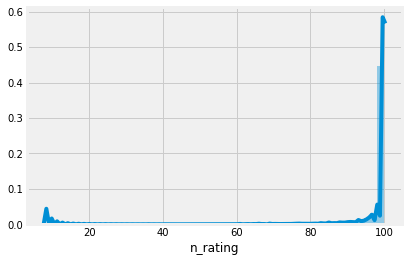

In [87]:
a2 = sns.distplot(books["n_rating"].dropna())

In [94]:
#Distribution of Genres

In [102]:
dataselected = pd.read_csv("dataset\\new\\elaboratedtagsselection.csv")

In [103]:
dataselected.head()


,Unnamed: 0,tag_id,occourances,sum,translation
0,2,33114,1912,1767440,young adult
1,3,11743,6239,3444805,fiction
2,4,10064,254,249435,dystopian
3,6,10059,253,199434,dystopia
4,7,11305,2578,3437378,fantasy


In [148]:
dataselected_reduction = dataselected.where(dataselected["occourances"] >= 1000).dropna()
dataselected_reduction

,Unnamed: 0,tag_id,occourances,sum,translation
0,2.0,33114.0,1912.0,1767440.0,young adult
1,3.0,11743.0,6239.0,3444805.0,fiction
4,7.0,11305.0,2578.0,3437378.0,fantasy
9,18.0,14487.0,1177.0,737769.0,historical fiction
11,23.0,26138.0,2221.0,1098162.0,romance
12,24.0,8055.0,1293.0,340547.0,contemporary
14,26.0,20939.0,1618.0,772168.0,mystery
15,27.0,30358.0,1078.0,251557.0,thriller


In [149]:
x = dataselected_reduction["translation"]
y = dataselected_reduction["occourances"]
x, y

(0            young adult
 1                fiction
 4                fantasy
 9     historical fiction
 11               romance
 12          contemporary
 14               mystery
 15              thriller
 Name: translation, dtype: object, 0     1912.0
 1     6239.0
 4     2578.0
 9     1177.0
 11    2221.0
 12    1293.0
 14    1618.0
 15    1078.0
 Name: occourances, dtype: float64)

In [150]:
y1 = [int(i) for i in y]
y1

[1912, 6239, 2578, 1177, 2221, 1293, 1618, 1078]

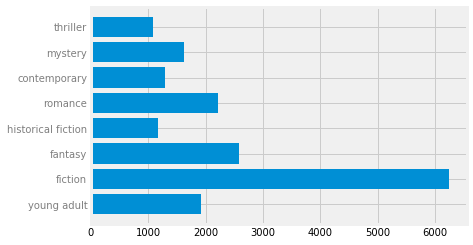

In [151]:
x_pos = np.arange(len(x))
plt.barh(x_pos, y1)
plt.yticks(x_pos, x, alpha=0.5)
plt.show()